In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from scipy.optimize import curve_fit as cf

In [9]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [19]:
df = pd.read_csv('Datos laser - Perfil lineal clase3.csv',header=0,names=['pos','pot'])
df.pos = df.pos*0.5 # una vuelta del tornillo del microposicionador es desplazar un micrómetro/micrón

In [20]:
from scipy.special import erf
perfil_gauss = lambda x,a,b,c,d : a*erf((x-b)/(np.sqrt(2)*c))+d

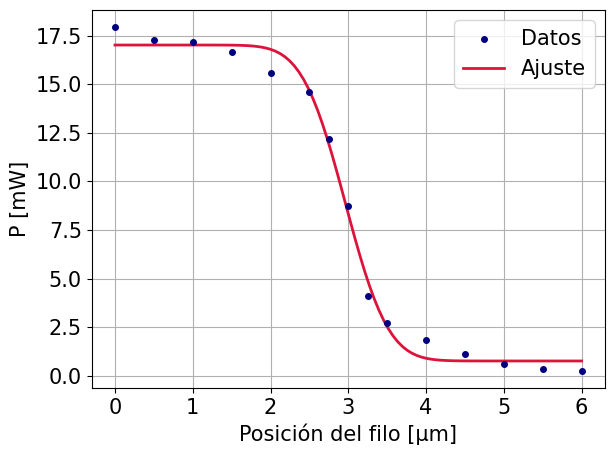

In [36]:
pars,cov = cf(perfil_gauss,df.pos,df.pot,p0=[-10,3,6,8.75])
a,b,c,d = pars

x_adj = np.linspace(min(df.pos),max(df.pos),100)
y_adj = perfil_gauss(x_adj,*pars)

plt.scatter(df.pos,df.pot,c='navy',label='Datos',zorder=2)
plt.plot(x_adj,y_adj,'crimson',label='Ajuste',zorder=1)
plt.xlabel('Posición del filo [\u00B5m]')
plt.ylabel('P [mW]')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('plots/perfil gauss.png')

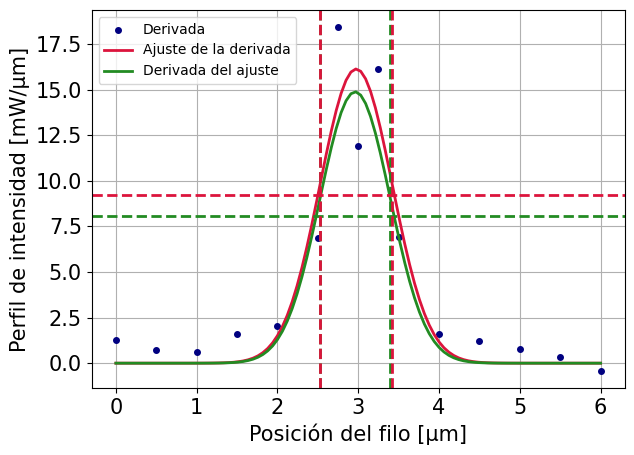

In [48]:
gaussian = lambda x,a,b,c : a*np.exp(-(x-b)**2/(2*c**2))

a_adj = abs(a*2/np.sqrt(np.pi)/(np.sqrt(2)*c))
b_adj = b
c_adj = c

derivada_ex = np.gradient(df.pot,df.pos)
pars2,cov2 = cf(gaussian,df.pos,derivada_ex,p0=[np.sqrt(2/np.pi)*a/c,b,c])
a_der,b_der,c_der = pars2
derivada_adj_ex = gaussian(x_adj,*pars2)

ancho = lambda c: c*np.log(2)

plt.scatter(df.pos,-derivada_ex,c='navy',label='Derivada')
plt.plot(x_adj,-derivada_adj_ex,'crimson',label='Ajuste de la derivada')
derivada_adj = gaussian(x_adj,np.sqrt(2/np.pi)*a/c,b,c)
plt.plot(x_adj,-derivada_adj,'forestgreen',label='Derivada del ajuste')
plt.grid()
plt.xlabel('Posición del filo [\u00B5m]')
plt.ylabel('Perfil de intensidad [mW/\u00B5m]')
plt.legend(fontsize=10,loc=2)
plt.tight_layout()
plt.axhline(max(np.abs(derivada_adj_ex))/2,c='forestgreen',ls='--')
plt.axvline(b_adj+c_adj,c='forestgreen',ls='--')
plt.axvline(b_adj-c_adj,c='forestgreen',ls='--')
plt.axhline(max(np.abs(derivada_ex))/2,c='crimson',ls='--')
plt.axvline(b_der+c_der,c='crimson',ls='--')
plt.axvline(b_der-c_der,c='crimson',ls='--')